<center>
    
## <font color='maroon'>ASTR 20500</font>
## <font color='maroon'>homework assignment 5</font>
    
### <font color='maroon'>Distribution statistics: mean, median, percentiles 
### <font color='maroon'>Working with SDSS images, characterization of sky background pixels and SNR of sources
    
    
#### <font color='black'>distributed: Monday, Nov 1</font>
#### <font color='black'>due: Friday, November 5 (9pm)</font>
    
    
#### 45 points total (+16 potential extra-credit points)
</center>
    

There is just one exercise in this assignment, but it is split into 8 tasks/steps. The exercise relies on the central limit theorem and statistical tools we were discussing in class so far to apply them to a real task of characterizing sky background in SDSS images and constructing a criterion to classify image pixels into background and source pixels. The latter can be then used to identify individual sources and measure their fluxes (this is a subject of extra-credit exercise in this homework, and will also be a basic task in one of the final projects). 

You are encouraged to work in a small group on this assignment. As before, if you work in a group, you can discuss ideas and results but note that the actual calculations that you will present in your homework should be your own and group work does not mean that code should be shared. Code that you will be submitted should be written by you independently. 


Statistics information you need to carry out exercises in this assignment is available in the notebooks  [06_pdf_gaussian_clt](https://drive.google.com/file/d/1v3xgr1Ra--YGtw0vfvORE6cobdbF-vju/view?usp=sharing) and [07_mean_error](https://drive.google.com/file/d/17DD-N2OKH_fCEAOxoPWdIAmgPm4njcw4/view?usp=sharing) and [04_expectation_variance_std](https://drive.google.com/file/d/1MgbxmGCYyk7TsQe0ATO1ZSzbMIWGt7-m/view?usp=sharing) (linearity of variance). 

Background Python information useful for this assignment is provided in the [hw05_background_info](https://drive.google.com/file/d/18SIyO9-1SziSEjWr7wDE8uoLtrQBStGL/view?usp=sharing) notebook. 

  

### <font color='blue'>Exercise 1 (45 points): separating sky background and source pixels in the SDSS images
    
**Background info.** Sloan Digital Sky Survey (SDSS) imaged a quarter of the sky in five "filters" called $u$, $g$, $r$, $i$, and $z$ that are sensitive to [different wavelength ranges](https://www.sdss.org/instruments/camera/) of light. You can read background information about the survey in [hw04_background_info](https://drive.google.com/file/d/1CXGu0VLQkylfLeXNdZqRWMMqWHrw-yt5/view?usp=sharing) notebook. 
    
SDSS images are available online and we will use one of them in this exercise. Pixel vales of an image contain flux values (energy of photons accumulated in a pixel per second of exposure) relative to the flux of a standard source and are in units of *nanomaggies* (see [here](https://www.sdss.org/dr13/algorithms/magnitudes/#Fluxunits:maggiesandnanomaggies) for details if you are curious). The smooth, non-uniform background estimate was already subtracted from these frames and this is why many of the sky pixels have negative values. One can always shift pixel values to the $\geq 0$ range by subtracting the minimum value estimated for all pixels. 
    
This is not required for this exercise, but if you are curious about details of properties of these image frames and what information the FITS header contains, you can read description [here](https://data.sdss.org/datamodel/files/BOSS_PHOTOOBJ/frames/RERUN/RUN/CAMCOL/frame.html). 
    
    
In this exercise you will exploit the Central Limit Theorem, statistics of a distribution such as mean, median, standard deviation, and percentiles, as well as properties of the Gaussian pdf to construct statistical tool to separate pixels into *sky background pixels* and *source pixels*. This tool can be subsequently used to define sources in an image and their signal-to-noise ratio. 

**Task 1a (8 points)** Implement a function with the format shown below. As described in the doc string, the function should be able to read a specified frame images in filters in the filters list and sum up pixel values of these images in a 2d list <tt>combined_image</tt> of the same dimensions as the images in individual filters. Each element of <tt>combined_image</tt> should be a sum of the pixel values in the corresponding elements of images of individual filters.
The function should return <tt>combined_image</tt> in the end. 

Test your function by producing <tt>combined_image</tt> and displaying the image using the <tt>plot_image</tt> function provided below. Make sure your function works even if the filters list contains a single filter (e.g., <tt>filters=['r']</tt>), in which case it should return the image in that filter. 

**_Note_**: You can take  <tt>field='4263', camcol='5', frame_number='0135'</tt> for tests or choose your own field, camcol, and frame numbers can be taken from the lists initialized below. 

**_Note_**: if you are comfortable with NumPy or want to start to learn how to use it in practice you can use NumPy arrays and operations here instead of lists. You can also use NumPy functions on lists. 

**_Note_**: You can use the URL function you implemented in exercise 4 of hw 4 or you can use string formatting of the following string to insert filter name into the following URL


In [ ]:
import numpy as np
from astropy.io import fits

def combine_sdss_images(field, camcol, frame_number, filters):
    '''
    Reads 5 images in the FITS format for a given field, camcol, and frame_number
    in the filters specified in the filters list and sums them up in a 2d list of the same dimension as the image
    
    Parameters: 
        field - str (e.g., '4263')
        camcol  - str ('1', '2', '3', '4', '5', or '6') - field number 
        frame_number - str - frame number (4 characters with leading 0s and integer, e.g. '0254')
        filters - list of str names of filters for which to combine images, for example
                  ['u', 'g', 'r', 'i', 'z'] to combine images in all 5 filters or 
                  ['g', 'r', 'i'] to combine images in g, r, and i filters
                  
    Returns: 
        combined_image - 2d list of dimensions of each SDSS frame, in which each element contains a sum of 
            images of the same frame in filters specified in filters list

    '''
    if camcol not in ['1','2','3','4','5','6']:
      print("Invalid CAMCOL Input.")
    for i in range(len(filters)):
      if filters[i] not in ['u','g','r','i','z']:
        print("Invalid Filter Input.")
    if len(frame_number) != 4:
      print("Invalid Frame Number.")

    

    for i in range(len(filters)):
      ssds_frame_url = "https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/{0}/{1}/frame-{2}-00{0}-{1}-{3}.fits.bz2".format(field, camcol, filters[i], frame_number)
      fimg = fits.open(ssds_frame_url)
      image = fimg[0].data.tolist()
      if i == 0:
        combined_image = np.zeros_like(image)
      combined_image += image
    return combined_image


In [ ]:
print(combine_sdss_images('4263', '5', '0135', ['g','r']))

[[-0.01128387 -0.00943756  0.01802063 ... -0.01809692  0.02309847
  -0.02484131]
 [-0.04309082  0.05387878  0.00631714 ...  0.03271484 -0.09042358
  -0.01659012]
 [ 0.04708862 -0.02828979  0.03502655 ... -0.03717041 -0.03318787
  -0.01190186]
 ...
 [ 0.00143433 -0.10452271  0.02279663 ...  0.07577515  0.04905701
  -0.02632904]
 [-0.04084778 -0.01980591  0.06323242 ... -0.01396179  0.07053375
  -0.04380798]
 [-0.00752258 -0.00500488 -0.00317383 ...  0.01737213  0.0004425
  -0.0032196 ]]


In [ ]:
'''
fields = ['4263', '4264', '4288', '4294']
camcols = ['1', '2', '3', '4', '5', '6']

# generate list of strings containing 4-character strings with frame numbers
frame_numbers = list(range(11,469))
for i, d in enumerate(dummy):
    if d < 100:
        frame_numbers[i] = '00' + str(d)
    else:
        frame_numbers[i] = '0' + str(d)
'''

"\nfields = ['4263', '4264', '4288', '4294']\ncamcols = ['1', '2', '3', '4', '5', '6']\n\n# generate list of strings containing 4-character strings with frame numbers\nframe_numbers = list(range(11,469))\nfor i, d in enumerate(dummy):\n    if d < 100:\n        frame_numbers[i] = '00' + str(d)\n    else:\n        frame_numbers[i] = '0' + str(d)\n"

In [ ]:
from matplotlib import pylab as plt
from matplotlib.colors import LogNorm

def plot_image(image, minsubtract=True, title=None, figsize=(10,10)):
    '''
    Plots an image using pixels in the input 2d list or NumPy array image
    '''
    if minsubtract:
        # Determine the minimum of image pixel values using "list comprehension"
        imin = min([min(row) for row in image]) # min() is a built-in function for finding minimum of a simple list
        # Subtract the minimum from each image pixel using nested list comprehension
        image_ = [[(x - imin) for x in row] for row in image]  
    else:
        image_ = image
    # Now plot the image with Matplotlib
    # Define a single panel plot of a given size
    fig, ax = plt.subplots(1,1, figsize=figsize)
    # Display image in list image using 'gray' colormap on a log stretch
    ax.imshow(image_, cmap='gray', norm=LogNorm(), origin='lower') 
    _ = ax.axis('off') # Do not plot axis ticks
    # Display plot title with the specified string
    if title is not None: ax.set_title(title)
    plt.show() # Show the plot

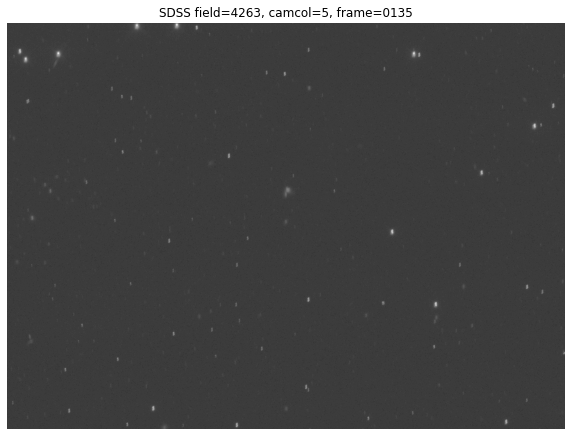

In [ ]:
url = 'https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/4263/5/frame-r-004263-5-0135.fits.bz2'
fimg = fits.open(url) 
image = fimg[0].data.tolist() # save image itself as a 2D list


plot_image(images['ugriz'], title='SDSS field=4263, camcol=5, frame=0135') #Run next block of code first, then run this one.

**Task 1b. (2 points)**  Use your function implemented in 1a to read images of a frame in each of the filters (without combining them), convert and put the 2d list for each image into a dictionary <tt>images</tt>, where keys 'u', 'g', 'r', 'i', 'z' should then give image in that filter (i.e., one can get r-filter image by <tt>images['r']</tt>). 

In addition, generate combined image by summing images in all filters ('u', 'g', 'r', 'i', 'z') and only in 3 filters 'g', 'r', 'i' and add these to the dictionary under keys 'ugriz' and 'gri'. 

In [ ]:
images = {}
field = '4263'
camcol = '5'
frame_number = '0135'
filters = ['u','g','r','i','z']

for key in filters:
  images[key] = combine_sdss_images(field, camcol, frame_number, [key])

images['ugriz'] = combine_sdss_images(field, camcol, frame_number, filters)
images['gri'] = combine_sdss_images(field, camcol, frame_number, ['g', 'r', 'i'])

In [ ]:
print(images['ugriz'])

[[-0.04079437  0.30175781  0.05912781 ... -0.32254028  0.17327547
   0.05408478]
 [ 0.25350189  0.28265381  0.0765686  ... -0.12889051 -0.03385925
   0.01763535]
 [-0.17068481 -0.09525681 -0.12226105 ... -0.05993652 -0.01320267
  -0.12536621]
 ...
 [-0.02694702  0.0799408  -0.02798462 ...  0.16375732  0.06315613
   0.17090607]
 [-0.13040161  0.11836147 -0.04864502 ...  0.17685699  0.15239716
   0.27851868]
 [ 0.01100159 -0.12181091  0.08805084 ... -0.0125351   0.09324265
  -0.17947292]]


**Task 1c (5 points).** For image in each individual filter (not combined), compute the mean, error of the mean, median, standard deviation of the pixel values, as well as the pixel value, $f_{99}$ for which 99% of pixel values are below it (99-percentile of the pixel value distribution). 

Compare the mean and the median values. Is the difference between them significant given the error of the mean you computed?  Provide a qualitative explanation for why the mean and median are different. (3 points)

Repeat the above for a combined image formed by summing images in all 5 filters in 1b. (2 points)

**_Note_**: for the error of the mean you are averaging pixels and so $n$ in the error of the mean formula is the number of pixels you are averaging. 

**_Note_**: if you will be formatting your output of the means, medians, exponent format for floating point numbers, such as <tt>.3e</tt> will format numbers as <tt>5.686e-02</tt>

**_Note_**: You can use <tt>xperc</tt> function from the [hw05_background_info](https://drive.google.com/file/d/18SIyO9-1SziSEjWr7wDE8uoLtrQBStGL/view?usp=sharing) notebook for the median and percentile and the functions for the mean and variance you implemented in hw 3, if you are staying away from NumPy. Note, however, that you have to "flatten" the 2d list containing image pixel values before you use this function (it expects 1d list as input). 

Alternatively, I'd recommend that you use 2d image list directly with the NumPy functions <tt>np.mean, np.median, np.std</tt>, and [<tt>np.percentile</tt> function](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html), as shown in [hw05_background_info](https://drive.google.com/file/d/18SIyO9-1SziSEjWr7wDE8uoLtrQBStGL/view?usp=sharing)<tt> notebook. You can use 2d list as input to these NumPy functions without flattening. 



In [ ]:
mean = {}
err_mean = {}
median = {}
std = {}
f99 = {}

for i in images:
  mean[i] = np.mean(images[i])
  std[i] = np.std(images[i])
  err_mean[i] = mean[i]/(np.sqrt(np.size(mean[i])))
  median[i] = np.median(images[i])
  f99[i] = np.percentile(images[i], 99)

print("{0:28} {1:17} {2:16} {3:16} {4:17} {5}".format("", "Mean", "Error of Mean", "StDev", "Median", "99th Percentile"))
print("For 'u'-filter: {0:30.15f} {1:12.14f} {2:12.14f} {3:15.15f} {4:.14f}".format(mean['u'], err_mean['u'], std['u'], median['u'], f99['u']))
print("For 'ugriz' combined filter: {0:10.15f} {1:11.13f} {2:10.13f} {3:10.15f} {4:.14f}".format(mean['ugriz'], err_mean['ugriz'], std['ugriz'], median['ugriz'], f99['ugriz']))

                             Mean              Error of Mean    StDev            Median            99th Percentile
For 'u'-filter:              0.003393147036914 0.00339314703691 0.27741998529488 0.000339508056641 0.08996582031250
For 'ugriz' combined filter: 0.058863077326606 0.0588630773266 3.0534560210357 0.012207031250000 0.46030536651611


For the 'u'-filter, we can see that the mean is $\mu_u=0.0034$ and the median is $\eta_u=0.00034$, we can quickly observe that $\mu_u = 10\eta_u$, i.e. $\mu_u$ is greater than $\eta_u$ by an entire order of magnitude. Thus, the difference between them is definitely significant, especially considering that the error of the mean $\mathrm{SE}=0.0034$. The mean and median are different likely because the median is a better estimator for the "average" pixel, which is usually a dark pixel since we are analyzing stellar images. Comparatively, the mean is subjected to the whims of outliers a lot more, since it actually averages all the pixels in our image, including the extremely bright ones. And this lines up with what we see -- the mean is a lot larger than the median -- indicating that it is skewed due to the bright pixels in the stellar image.

Meanwhile, for the 'ugriz' combined filter, we have that $\mu_{ugriz}=0.0589$ and $\eta_{ugriz}=0.0122$, i.e. $\mu_{ugriz}\approx 5\eta_{ugriz}$. This implies that the difference *could* be statistically different, but not necessarily. The mean and the median for our 'ugriz' combined filter are so much closer together than for the 'u'-filter probably because we are now analyzed a combined image, which will naturally be brighter and more consistent.

**Task 1d. (5 points)** Construct new 1d lists (or numpy arrays) for each filter and for the combined image that contain only pixel values smaller than $f_{99}$ and store these as entries in a new dictionary accessible by keys like 'r', 'g', 'ugriz'.  

Also store in the dictionaries with the same keys their means, medians, and standard deviations (e.g., you can store mean for the truncated list for r-band image into <tt>means['r']</tt> where <tt>means</tt> is the dictionary for storing mean values. Or you can construct one dictionary for all statistics and use keys to distinguish which one is which. 

Compare the means and the medians for a given filter (say 'r') for these "truncated" lists of values. How does the difference between them compares to the difference you observed in 1c? Briefly comment on what you find and explain the result. (3 points)

Compare standard deviations of values in these truncated lists for individual filters and for the combined image. How does the standard deviation of pixel values compare to what you expect given the standard deviations for individual filters? Compute and present the estimate of the expected standard deviation for the combined image and compare this estimate to the actual standard deviation estimated for the combined image. (2 points)

**_Note_**: you will get **1 extra credit point** if you use a 2d dictionary <tt>pix_stats</tt> to store means, medians, and standard deviation so that you can access them as say <tt>pix_stats['r']['mean']</tt> to get mean of the pixel values for the $r$-filter image or <tt>pix_stats['i']['std']</tt> to get standard deviation of the pixel values of the $i$-band image. See hw05_background_info on how to initialize and use nested (2d) dictionaries. 


**_Hint_**: for the last question, think about how linearity of variance applies to this case. 

**_Note_**: chopping pixels at 99% value may seem arbitrary and it is to a certain extent. We use this simple threshold here for simplicity in lieu of a more accurate method of iteratively removing the values in the tail of the distribution, such as [sigma clipping](https://www.gnu.org/software/gnuastro/manual/html_node/Sigma-clipping.html). See extra-point exercise 1i below. 

In [ ]:
pix_stats = {}
temp_list = {}
trunc_pix = {}
comb_filters = ['u', 'g', 'r', 'i', 'z', 'gri', 'ugriz']

for i in comb_filters:
  temp_list[i] = list(np.array(images[i]).flatten())
  f99_val = np.percentile(temp_list[i], 99)
  trunc_list = []
  for x in temp_list[i]:
    if x < f99_val:
      trunc_list.append(x)
  trunc_pix[i] = trunc_list
  pix_stats[i] = {}
  pix_stats[i]['mean'] = np.mean(trunc_pix[i])
  pix_stats[i]['median'] = np.median(trunc_pix[i])
  pix_stats[i]['std'] = np.std(trunc_pix[i])

In [ ]:
print("'r'-filter Stats:\nMean =",pix_stats['r']['mean'],"\nMedian =",pix_stats['r']['median'])
print("\nStandard Deviation for:\n 'u'-filter =", 
      pix_stats['u']['std'], "\n 'g'-filter =", 
      pix_stats['g']['std'], "\n 'r'-filter =", 
      pix_stats['r']['std'], "\n 'i'-filter =", 
      pix_stats['i']['std'], "\n 'z'-filter =", 
      pix_stats['z']['std'], "\n Combined 'ugriz'-filter =", 
      pix_stats['ugriz']['std'])

'r'-filter Stats:
Mean = 0.001098491589701435 
Median = -0.0002732276916503906

Standard Deviation for:
 'u'-filter = 0.03558045531598877 
 'g'-filter = 0.017408036150400586 
 'r'-filter = 0.027740450110688618 
 'i'-filter = 0.04509510677191828 
 'z'-filter = 0.14686961085688507 
 Combined 'ugriz'-filter = 0.16357228568235063


For the 'r'-filter of these "truncated" lists of values, we found a mean $\mu_r=0.00110$ and a median $\eta_r=-0.00027$. Just like in part (c), we find an approximate difference of one order-of-magnitude, for similar reasoning as explained in part (c). We also find a smaller mean and median, reflecting how we are cutting off our data points and taking just the values up to the 99th percentile. Specifically, notice the negative median value, demonstrating how we are cutting off the brighter sky pixels and analyzing the darker ones.

For the standard deviation of each of our filters, they are all on the same order of magnitude (for the most part), so let's take the 'r'-filter as an example. The standard deviation of the 'ugriz'-filter, $\sigma_{ugriz}\approx 0.164$ is approximately 5 times that of the 'r'-filter, $\sigma_r\approx 0.0356$, which makes sense since we are combining our five filters, i.e. stacking up their standard deviations five times. This is a very nice example of the linearity of variance in action, which would yield a similar value for the 'ugriz'-filter if we went this route for computing it.

Now let's compare the estimate for the expected standard deviation for the combine image to the actual standard deviation estimated for the combined image. We can do this by taking the square root of the sum of the variances for each of our filter.

In [ ]:
u = pix_stats['u']['std']**2
g = pix_stats['g']['std']**2
r = pix_stats['r']['std']**2
i = pix_stats['i']['std']**2
z = pix_stats['z']['std']**2

exp_val = (u+g+r+i+z)**0.5

print("Estimate for the expected standard deviation of the combined image:",exp_val)

Estimate for the expected standard deviation of the combined image: 0.16106766386669266


So we find that the expected standard deviation for the combined image is approximately $\sigma_{est}=0.161$, which is very close to our actual value of $\sigma_{ugriz}=0.164$, presenting a mere $0.003$ value difference.

**Task 1e. (10 points)** Plot distribution of pixel values in the 1d lists obtained in 1d for individual filters as separate histograms, but plotted on the same plot. This can be arranged in a loop like this

        alpha = 1.
        for f in ['u', 'g', 'r', 'i', 'z']: 
            plt.hist(..., alpha=alpha, label='filter = {:s}'.format(f))
            alpha -= 0.15
       
This will plot all histograms in one plot, with each subsequent histogram somewhat more transparent than the previous one. Transparency in Matplotlib is controlled by the <tt>alpha</tt> parameter, as described in [hw05_background_info](https://drive.google.com/file/d/18SIyO9-1SziSEjWr7wDE8uoLtrQBStGL/view?usp=sharing) notebook. (4 points)

On a separate plot, plot the histogram of the pixel values smaller than $f_{99}$ in a combined image of all 5 filters but with <tt>density=True</tt>. Overplot the Gaussian pdf as a line with the mean and standard deviation estimated for the values in this list. Try replacing mean with the median to see if the Gaussian line matches the histogram better. (6 points).  

**_Note_**: To make a legend out of specified labels you include this after the loop: 
    plt.legend(loc='best', frameon=False) # frameon controls whether legend is surrounded by a rectangular frame

**_Note_**: <tt>plt.hist</tt> can be quite slow if you try to use all pixels with values smaller than $f_{99}$. Recall that you can use slicing operations (in particular "scanning" with a given step) to easily subselect a fraction of all values (say 1/5 or 1/10) to make the plotting faster.  

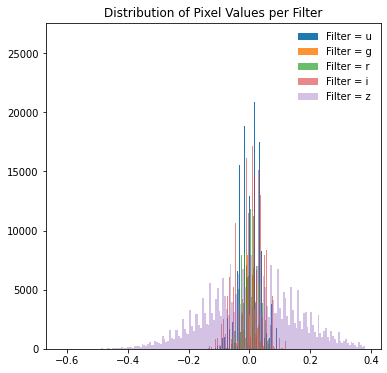

In [ ]:
import matplotlib.pylab as plt

fig = plt.figure(figsize=(6,6))
alpha = 1.
for f in ['u', 'g', 'r', 'i', 'z']: 
  hist_list = trunc_pix[f]
  plt.hist(hist_list[::10], alpha=alpha, label='Filter = {:s}'.format(f), bins='auto') #what do we mean with slicing? do we just want a sample and not all?
  alpha -= 0.15

plt.legend(loc='best', frameon=False)
plt.title('Distribution of Pixel Values per Filter')
plt.show()

In [ ]:
from math import e, pi

def gaussian_pdf(x, mu=0., sigma=1.):
    """
    returns value of the Gaussian pdf with input mu, sigma for input x 

    Parameters:
    -----------
    x:     a float or a 1d numpy array of floats, input x value(s)
    mu:    a float, mean of the Gaussian (default 0)
    sigma: a float, st. deviation of the Gaussian (default 1.0)
    
    Returns:
    --------
    
    g(x): a float - value of the Gaussian pdf for input x value(s)
    """
    assert(sigma !=0.)

    return 1./(2.*pi)**0.5/sigma * e**(-0.5*((x-mu)/sigma)**2)

def gauss_line(xmin, xmax, dx=0.01, mu=0., sigma=1.):
    '''
    construct lists of x values and corresponding Gaussian pdf values with specified mu and st dev sigma
    
    Returns:
    xp, pgauss - lists of floats containing x values in the range [xmin,xmax] and pdf values p_Gauss(x)
    '''
    pgauss = []
    xp = []
    x = xmin # start at the minimum
    dx = dx * (xmax - xmin) # increase x with step dx

    while x <= xmax: 
        pgauss.append(gaussian_pdf(x, mu=mu, sigma=sigma))
        xp.append(x)
        x = x + dx
        
    return xp, pgauss

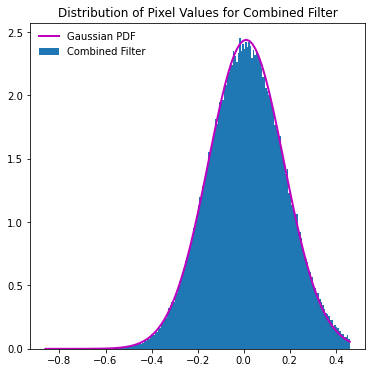

In [ ]:
fig = plt.figure(figsize=(6,6))

hist_list = trunc_pix['ugriz']
plt.hist(hist_list[::10], alpha=1, label='Combined Filter', bins='auto', density=True)

xp, pgauss = gauss_line(min(hist_list), max(hist_list), mu=pix_stats['ugriz']['mean'], sigma=pix_stats['ugriz']['std'])
plt.plot(xp, pgauss, c='m', lw=2., label='Gaussian PDF')
plt.legend(loc='best', frameon=False)
plt.title("Distribution of Pixel Values for Combined Filter")
plt.show()

**Task 1f. (5 points)** The parameters of the best match for the Gaussian pdf obtained in 1e can now be used to define the distribution of the background pixel values and to statistically judge whether a given pixel is consistent with being a sky background or belongs to a source. 


SDSS images you are working with in this exercise have 1489 rows and 2048 columns and so the total number of pixels is 

In [ ]:
1489*2048

3049472

Some of these pixels are associated with sources, but this is usually a small fraction which can be neglected in the estimate we will be doing. Function below uses the calculation introduced at the end of 07_mean_error notebook and computes the probability for a given random draw from a Gaussian pdf with mean and st deviation $\mu$ and $\sigma$ to have a value $\geq x$. 

Present an argument for a specific threshold pixel value of the flux, below which we can label pixel in the combined image as a sky background pixel, while pixels with flux values above the threshold as source pixels.

**_Hint_**: the logic of an argument here is related to the logic of the argument in exercise 4 of hw 2 about number of fields in the quasar survey, but in reverse: here we know the number of trials (the number of pixels in an image) and we need to find out the smallest probability that would still be naturally expected to happen at least once in that many trials. 

**_Note_**: there is almost no coding involved in this task. Just a couple of relatively simple estimates. 

In [ ]:
from scipy.special import erf

def gauss_prob(x, mu=0, sigma=1): 
    '''Assuming a Gaussian pdf with mean and st deviation mu and sigma 
    this function computes the probability for a given random draw from this pdf to have 
    value of x or larger 
    
    Parameters:
        x - float, the value for which to evaluate the probability
        mu, sigma - float, keyword parameters for the mean and st deviation of the Gaussian pdf
        
    Returns:
        p - float, probability for a random draw from this Gaussian pdf to have value >= x
    '''
    assert(sigma > 0)
    # z - the normalized x value
    z = (x - mu) / sigma
    # this is 1 - 2 * P(<x) = 1 - 2*0.5*(1 + erf(z/sqrt(2))) = -erf(z/sqrt(2))
    pz = -erf(-z/2**0.5) # this is probability P(<z)
    return 1-pz # we want the 1-P(<z)

In [ ]:
# x = 3*sigma for mu=0, sigma=1
print(gauss_prob(3))

# the same for non-default values of mu and sigma
mu, sigma = 1, 3
print(gauss_prob(mu+3*sigma, mu=mu, sigma=sigma))

0.002699796063260207
0.002699796063260207


We need to figure out the the probability for the largest flux that would still be "normal" to expect int the image. Since we have $N$ pixels and we'd expect to have $pN$ pixels, where $p$ is the probability of having background pixels, then we know that $p<\frac{1}{N}$, so $p=\frac{1}{N}$ is our upper limit. From here, we can use the fact that $$z=\frac{x-\mu}{\sigma}\implies x=z\sigma + \mu$$ where $x$ would be our threshold value. To find our $z$-score value, we can brute force our way through by checking every value in the probability density function until we hit the limit we're looking for.

In [ ]:
p = 1/3049472
sigma = pix_stats['ugriz']['std']
z = 0
i = p

while p <= i:
  i = gauss_prob(z*sigma, sigma=sigma)
  z += 0.01
x = z*sigma

print("The threshold value is:", x)

The threshold value is: 0.8374901026936247


**Task 1g. (3 points)** Set all pixels in the combined image with fluxes below the threshold value you come up with in 1f to a small value (e.g. 1e-2) and plot the resulting image using <tt>plot_image</tt> function above but with <tt>minsubtract=False</tt> (to not subtract the minimum value). 

**_Hint_**: if done correctly, the background in the plotted image should be uniformly black and only source pixels should be not black. 

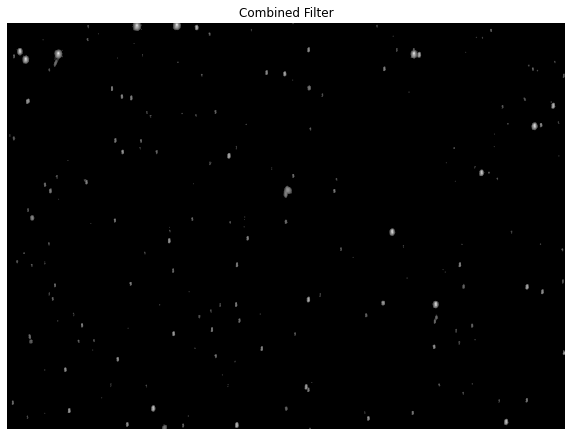

In [ ]:
img = np.copy(images['ugriz'])
for i, row in enumerate(images['ugriz']):
  for j, col in enumerate(row):
    if col < x:
      img[i,j] = 1e-2

plot_image(img, minsubtract=False, title = 'Combined Filter')

**Task 1h. (7 points)** Now that you have an estimate of the mean sky background and its standard deviation in the sky background pixels, you can use this to estimate the signal-to-noise ratio (SNR) for a source. The SNR is defined as:

$${\rm SNR} = \frac{\hat{f}_s}{\sigma(\hat{f}_s)} = \frac{\hat{f}_s}{\sqrt{\sigma^2(\hat{f}_{\rm tot}) + \sigma^2(\hat{f}_b)}}\approx \frac{\hat{f}_{\rm tot}-\hat{f}_b}{\sqrt{\sigma^2(\hat{f}_{\rm tot}) + \sigma^2(\hat{f}_b)}},$$

where $\hat{f}_{\rm tot}$ is the estimate of the total flux in all of the source pixels, $\hat{f}_b$ is the background flux in the same number of pixels as included in the source, and $\hat{f}_s\approx \hat{f}_{\rm tot}-\hat{f}_b$ is our estimate of the source flux

Suppose we identify $N_{s}=33$ adjacent source pixels as a source and measure the total flux summed from these pixels in the combined ubriz image to be $\hat{f}_{\rm tot}=4.432$ with $\sigma(\hat{f}_{\rm tot})=0.05$. What is the SNR of this source given the parameters of the background sky pixel pdf that you estimated in 1e? 

What would be the SNR if the same $\hat{f}_{\rm tot}=4.432$ and $\sigma(\hat{f}_{\rm tot})=0.05$ were measured in the gri combined image?

**_Note_**: $\sigma^2(\hat{f}_b)$ here is *not* the variance of the fluxes in individual sky background pixels, but variance of the background flux in the $N_s$ pixels. Likewise, $\hat{f}_b$ is the estimate of the background flux in the $N_s$ pixels. 

**_Note_**: As discussed previously (see the end of [04_expectation_variance_std](https://drive.google.com/file/d/1MgbxmGCYyk7TsQe0ATO1ZSzbMIWGt7-m/view?usp=sharing) notebook), usually sources with ${\rm SNR}\geq 5$ are considered solid detections, although sometimes sources with ${\rm SNR}\sim 3-5$ are also analyzed or followed up observationally. 

**_Hint_**: think about the linearity of variance here to compute denominator in the SNR. 

**_Note_**: there is no coding in this exercise, just calculations using estimates you obtained above. If you did not obtain an estimate of the background standard deviation, you can still do this exercise. Just ask instructors and estimate of st deviation for background pixels will be given to you. 

In [ ]:
def compute_snr(ftot, fb, var_ftot, var_fb):
  return (ftot-fb) / (var_ftot+var_fb)**0.5

In [ ]:
ftot = 4.432
var_f_tot = 0.05**2
Ns = 33

fb33_ugriz = pix_stats['ugriz']['mean']*Ns #Approximation of the background flux is about 33 times the mean
fb33_gri = pix_stats['gri']['mean']*Ns

var33_fb_ugriz = (pix_stats['ugriz']['std']**2)*Ns
var33_fb_gri = (pix_stats['gri']['std']**2)*Ns

snr_ugriz = compute_snr(ftot, fb33_ugriz, var_ftot, var33_fb_ugriz)
snr_gri = compute_snr(ftot, fb33_gri, var_ftot, var33_fb_gri)

print("Signal-to-Noise Ratio for 'ugriz'-filter: {:>6.3f}".format(snr_ugriz))
print("Signal-to-Noise Ratio for 'gri'-filter: {:>8.3f}".format(snr_gri))

Signal-to-Noise Ratio for 'ugriz'-filter:  4.336
Signal-to-Noise Ratio for 'gri'-filter:   12.979


Since our Signal-to-Noise Ratio for the 'ugriz'-filter is 4.336, then we can conclude that more observation of this region is recommended as there *could* be a real source and not a result of a statistical fluctuation in the sky background.

Meanwhile, since our Signal-to-Noise ratio for the 'gri'-filter is 12.979, then it is very safe to conclude that there is a real source in this region and it is not a statistical fluctuation in the sky background.

**Task 1i (15 extra-credit points).** Chopping pixels at 99% value as is done in 1d above may seem arbitrary and it is to a certain extent. We can use a more objective and robust method, such as [sigma clipping](https://www.gnu.org/software/gnuastro/manual/html_node/Sigma-clipping.html). You can implement a function with this method for extra 15 points and apply it to remove the tail of high fluxes instead of using a fixed threshold in 1d. 

**The sigma clipping method.** You first choose a threshold value of number of standard deviations to remove outliers: <tt>s_th</tt> and the number of iterations <tt>niter</tt>. In the beginning none of the data is flagged as outliers. The method then  consists of <tt>niter</tt> *iterations* each consisting of the following steps: 

     set s_th to some value
     set niter to some value 
     
     while niter > 0 
         compute mean and standard deviation xstd for the current sample 
         using data values not yet flagged as outliers
     
         identify all x values in the data sample for which abs((x - xmean))/xstd > s_th
         and flag them as outliers, so that they won't be used 
         in the estimate of xm and xstd anymore 
     
         niter = niter - 1

The median of a sample of $x_i$ values is defined as the value $x_{\rm med}$ for which exactly half of the sample has values $\leq x_{\rm mean}$. 

**Tools you will need need.** 

* A function computing mean and standard deviation for a list of data values. 

* A method for flagging the outliers. A reasonable approach is to initialize a boolean (logical) list consisting of True values of the same dimensions as the list (or numpy array) containing data. The element of that array with the index of identified outlier can then be set to False and only elements with True values are then considered in the computation of the median and standard deviation.  

* Implement the sigma clipping algorithm in a function with an interface like below (**10 points**): 

    def sigma_clip(data, niter = 3, s_th = 3.): 
        '''
        sigma-clipping of in input values in data 
        
        Parameters:
        -----------
        data:  a list or NumPy array
        niter: int, number of iterations to carry out
        s_th:  float, the number of st. deviations to use to identify outliers
        
        Returns:
        --------
        outflag: a boolean list or NumPy array that has the same size and "shape" as data
                and contains False values for elements that are flagged as outliers, and True
                True values for all other elements
        '''

* Write a code that would call the function you implemented with a given choice of <tt>niter</tt> and <tt>s_th</tt> using the list produced by <tt>mock_cmb_data</tt> and compute mean and standard deviation taking into account only non-outlier data (i.e. not using outliers in the calculation). As a test, the result of this calculation should be close (but not necessarily identical) to the true values of the mean (2.726) and standard deviation (<tt>5e-6</tt>). Try to adjust <tt>niter</tt> and <tt>s_th</tt> values to get as close as possible to the true values. (**5 points**) 


In [ ]:
def mock_cmb_data(nd = 10000, t_cmb = 2.726, st = 2.e-6, 
                  fracout=1.e-2, offout = 0.1, sout=1.e-4):
    '''
    generate mock CMB data with outliers
    meant to be used as a "black box" in this homework
    '''
    import numpy as np
    # generate nd Gaussian numbers with mean and std specified by input parameters
    data = np.random.normal(loc = t_cmb, scale = st, size = nd)
    nout = int(fracout * nd) # number of outliers
    iout = np.random.randint(low = 0, high = nd, size = nout) # indices of outliers
    data[iout] += ((np.random.uniform(size = nout) - 0.25) * sout) # outlier temperatures
    return list(data) # return list of mock data

nd = 10000
tdata = mock_cmb_data(nd = nd, st = 5e-6)